# Objective: Analyze how changes in interest rates impact mortgage REIT (mREIT) performance and develop strategies to mitigate the associated risks. This will involve both scenario analysis and risk management, incorporating Monte Carlo simulations for added robustness.
## Scope:
* mREITs: Focus on a few key mREITs like Annaly Capital Management (NLY), AGNC
Investment Corp. (AGNC), or others that are significant in the market.
* Interest Rates: Concentrate on the federal funds rate, mortgage rates, and treasury yields. Consider whether to include other economic indicators like inflation rates.
* Scenario Analysis: Plan to explore different interest rate environments (e.g., rising, falling, stable rates) and use Monte Carlo simulations to assess a wide range of potential outcomes.

## *  Phase 1 - Setup

In [4]:
!git config --global user.name "Mauz Ahmed"
!git config --global user.email "mauz.ahmed@rutgers.edu"

from google.colab import files
files.download('mREIT.ipynb')



FileNotFoundError: Cannot find file: mREIT.ipynb

In [45]:


import yfinance as yf

# Downloading data for NLY
nly = yf.download('NLY', start='2000-01-01', end='2024-01-01')
nly.to_csv('NLY_yfinance_data.csv')
print("File saved successfully")

!pip install quandl
import quandl

from google.colab import userdata
userdata.get('')
data = quandl.get('FRED/GDP')

import yfinance as yf

# Downloading data for NLY
nly = yf.download('NLY', start='2000-01-01', end='2024-01-01')
nly.to_csv('NLY_yfinance_data.csv')

#import requests

#url = 'https://api.treasury.gov/resource_url_here'
#response = requests.get(url)
#treasury_data = response.json()

import pandas_datareader as pdr

# Example: Get Federal Funds Rate data
ffr = pdr.get_data_fred('DFF', start='2000-01-01', end='2024-01-01')
ffr.to_csv('fed_funds_rate.csv')


[*********************100%***********************]  1 of 1 completed


File saved successfully


[*********************100%***********************]  1 of 1 completed


In [6]:
###Rithm Capital
import yfinance as yf

# Downloading historical data for Rithm Capital (RITM)
ritm = yf.download('RITM', start='2000-01-01', end='2024-01-01')
ritm.to_csv('RITM_yfinance_data.csv')  # Save the data to a CSV file

# Verify the data
ritm.head()
ritm.info()
ritm.describe()

[*********************100%***********************]  1 of 1 completed

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2685 entries, 2013-05-02 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2685 non-null   float64
 1   High       2685 non-null   float64
 2   Low        2685 non-null   float64
 3   Close      2685 non-null   float64
 4   Adj Close  2685 non-null   float64
 5   Volume     2685 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 146.8 KB


,Open,High,Low,Close,Adj Close,Volume
count,2685.000000,2685.000000,2685.000000,2685.000000,2685.000000,2.685000e+03
mean,12.930547,13.062078,12.780291,12.920726,7.024149,3.779543e+06
std,3.230480,3.213885,3.249728,3.234854,2.085323,3.770040e+06
min,3.760000,3.870000,2.910000,3.330000,2.203514,1.395000e+05
25%,10.310000,10.460000,10.180000,10.330000,5.058311,1.872200e+06
50%,12.860000,13.000000,12.700000,12.850000,7.326015,2.998000e+06
75%,15.970000,16.070000,15.840000,15.960000,8.678511,4.507900e+06
max,18.709999,18.750000,18.620001,18.680000,11.666050,5.322300e+07


## * Phase 2 - Data Collection

In [7]:
import yfinance as yf

# For Rithm Capital (RITM)
ritm = yf.download('RITM', start='2000-01-01', end='2024-01-01')
ritm.to_csv('RITM_yfinance_data.csv')

# For Annaly Capital Management (NLY)
nly = yf.download('NLY', start='2000-01-01', end='2024-01-01')
nly.to_csv('NLY_yfinance_data.csv')

# For AGNC Investment Corp (AGNC)
agnc = yf.download('AGNC', start='2000-01-01', end='2024-01-01')
agnc.to_csv('AGNC_yfinance_data.csv')

# For HA Sustainable Infrastructure Capital, Inc. (HASI)
hasi = yf.download('HASI', start='2000-01-01', end='2024-01-01')
hasi.to_csv('HASI_yfinance_data.csv')





[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [8]:
import pandas_datareader as pdr

# Get Federal Funds Rate data from FRED
ffr = pdr.get_data_fred('DFF', start='2000-01-01', end='2024-01-01')
ffr.to_csv('fed_funds_rate.csv')  # Save the data to a CSV file

# Verify the data
ffr.head()

# 10-Year Treasury Yield
treasury_yield = pdr.get_data_fred('DGS10', start='2000-01-01', end='2024-01-01')
treasury_yield.to_csv('10_year_treasury_yield.csv')

# 30-Year Fixed Rate Mortgage Average
mortgage_rate = pdr.get_data_fred('MORTGAGE30US', start='2000-01-01', end='2024-01-01')
mortgage_rate.to_csv('mortgage_rate.csv')

# Verify the data
treasury_yield.head()
mortgage_rate.head()


,MORTGAGE30US
DATE,
2000-01-07,8.15
2000-01-14,8.18
2000-01-21,8.26
2000-01-28,8.25
2000-02-04,8.25


In [9]:
# Consumer Price Index (CPI) for All Urban Consumers
cpi = pdr.get_data_fred('CPIAUCSL', start='2000-01-01', end='2024-01-01')
cpi.to_csv('cpi_data.csv')


# Verify the data
cpi.head()



,CPIAUCSL
DATE,
2000-01-01,169.3
2000-02-01,170.0
2000-03-01,171.0
2000-04-01,170.9
2000-05-01,171.2


In [10]:
import pandas as pd

# Example: Check for missing values in Rithm data
print(ritm.isnull().sum())

# Resample interest rate data to match daily frequency if necessary
ffr_resampled = ffr.resample('D').ffill()  # Forward-fill missing days
ffr_resampled.to_csv('fed_funds_rate_resampled.csv')

# Example: Calculate 30-day moving average of Rithm's closing price
ritm['30_day_MA'] = ritm['Close'].rolling(window=30).mean()
ritm.to_csv('RITM_with_MA.csv')




Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [11]:
# Save cleaned and prepared data for mREITs
ritm.to_csv('RITM_cleaned.csv')
nly.to_csv('NLY_cleaned.csv')
agnc.to_csv('AGNC_cleaned.csv')
hasi.to_csv('HASI_cleaned.csv')

# Save resampled and cleaned interest rate data
ffr_resampled.to_csv('fed_funds_rate_cleaned.csv')
treasury_yield.to_csv('10_year_treasury_yield_cleaned.csv')
mortgage_rate.to_csv('mortgage_rate_cleaned.csv')
cpi.to_csv('cpi_cleaned.csv')

# Verification
print("Data preparation complete. All files saved successfully.")


Data preparation complete. All files saved successfully.


In [12]:
##Handling Missing Values

ritm['30_day_MA'].fillna(method='ffill', inplace=True)
ritm.dropna(subset=['30_day_MA'], inplace=True)
treasury_yield.interpolate(method='linear', inplace=True)
mortgage_rate.interpolate(method='linear', inplace=True)

# Recheck for missing values
print("Rechecking missing values in RITM data:")
print(ritm.isnull().sum())

print("Rechecking missing values in Treasury Yield data:")
print(treasury_yield.isnull().sum())

print("Rechecking missing values in Mortgage Rate data:")
print(mortgage_rate.isnull().sum())

# Update for filling missing values in Rithm's 30-day moving average
ritm['30_day_MA'] = ritm['30_day_MA'].ffill()

# Update for filling missing values in Treasury Yield and Mortgage Rate data
treasury_yield = treasury_yield.ffill()
mortgage_rate = mortgage_rate.ffill()



Rechecking missing values in RITM data:
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
30_day_MA    0
dtype: int64
Rechecking missing values in Treasury Yield data:
DGS10    0
dtype: int64
Rechecking missing values in Mortgage Rate data:
MORTGAGE30US    0
dtype: int64


<ipython-input-12-5102873ea187>:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ritm['30_day_MA'].fillna(method='ffill', inplace=True)


## * Phase 3 - Data Preparation and Exploration

In [13]:
# Check for missing values in each mREIT dataset
print("Missing values in RITM data:")
print(ritm.isnull().sum())

print("Missing values in NLY data:")
print(nly.isnull().sum())

print("Missing values in AGNC data:")
print(agnc.isnull().sum())

print("Missing values in HASI data:")
print(hasi.isnull().sum())

# Check for missing values in interest rate datasets
print("Missing values in Federal Funds Rate data:")
print(ffr_resampled.isnull().sum())

print("Missing values in 10-Year Treasury Yield data:")
print(treasury_yield.isnull().sum())

print("Missing values in Mortgage Rate data:")
print(mortgage_rate.isnull().sum())


Missing values in RITM data:
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
30_day_MA    0
dtype: int64
Missing values in NLY data:
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
Missing values in AGNC data:
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
Missing values in HASI data:
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
Missing values in Federal Funds Rate data:
DFF    0
dtype: int64
Missing values in 10-Year Treasury Yield data:
DGS10    0
dtype: int64
Missing values in Mortgage Rate data:
MORTGAGE30US    0
dtype: int64


In [14]:
# Fill missing values with the previous day's data (forward fill)
ritm.fillna(method='ffill', inplace=True)
nly.fillna(method='ffill', inplace=True)
agnc.fillna(method='ffill', inplace=True)
hasi.fillna(method='ffill', inplace=True)

# Forward fill for interest rates as well
ffr_resampled.fillna(method='ffill', inplace=True)
treasury_yield.fillna(method='ffill', inplace=True)
mortgage_rate.fillna(method='ffill', inplace=True)


<ipython-input-14-27f9f49ccd1e>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ritm.fillna(method='ffill', inplace=True)
<ipython-input-14-27f9f49ccd1e>:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  nly.fillna(method='ffill', inplace=True)
<ipython-input-14-27f9f49ccd1e>:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  agnc.fillna(method='ffill', inplace=True)
<ipython-input-14-27f9f49ccd1e>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  hasi.fillna(method='ffill', inplace=True)
<ipython-input-14-27f9f49ccd1e>:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ff

In [15]:
# Calculate 30-day moving averages for mREITs
ritm['30_day_MA'] = ritm['Close'].rolling(window=30).mean()
nly['30_day_MA'] = nly['Close'].rolling(window=30).mean()
agnc['30_day_MA'] = agnc['Close'].rolling(window=30).mean()
hasi['30_day_MA'] = hasi['Close'].rolling(window=30).mean()


In [16]:
# Calculate daily percentage changes for mREITs
ritm['Pct_Change'] = ritm['Close'].pct_change()
nly['Pct_Change'] = nly['Close'].pct_change()
agnc['Pct_Change'] = agnc['Close'].pct_change()
hasi['Pct_Change'] = hasi['Close'].pct_change()

# Ensure the data is correctly aligned before calculating pct_change
ffr_resampled = ffr_resampled.asfreq('D').ffill()  # Ensure daily frequency and forward-fill
treasury_yield = treasury_yield.asfreq('D').ffill()
mortgage_rate = mortgage_rate.asfreq('D').ffill()

# Calculate the percentage change on specific columns
ffr_resampled['Pct_Change'] = ffr_resampled['DFF'].pct_change()
treasury_yield['Pct_Change'] = treasury_yield['DGS10'].pct_change()
mortgage_rate['Pct_Change'] = mortgage_rate['MORTGAGE30US'].pct_change()

# Check the first few rows to verify
print(ffr_resampled.head())
print(treasury_yield.head())
print(mortgage_rate.head())



             DFF  Pct_Change
DATE                        
2000-01-01  3.99         NaN
2000-01-02  3.99    0.000000
2000-01-03  5.43    0.360902
2000-01-04  5.38   -0.009208
2000-01-05  5.41    0.005576
            DGS10  Pct_Change
DATE                         
2000-01-03   6.58         NaN
2000-01-04   6.49   -0.013678
2000-01-05   6.62    0.020031
2000-01-06   6.57   -0.007553
2000-01-07   6.52   -0.007610
            MORTGAGE30US  Pct_Change
DATE                                
2000-01-07          8.15         NaN
2000-01-08          8.15         0.0
2000-01-09          8.15         0.0
2000-01-10          8.15         0.0
2000-01-11          8.15         0.0


In [17]:
# Merge mREITs with interest rate data for correlation analysis
merged_data = pd.DataFrame({
    'RITM_Returns': ritm['Pct_Change'],
    'NLY_Returns': nly['Pct_Change'],
    'AGNC_Returns': agnc['Pct_Change'],
    'HASI_Returns': hasi['Pct_Change'],
    'Fed_Funds_Rate_Change': ffr_resampled['Pct_Change'],
    'Treasury_Yield_Change': treasury_yield['Pct_Change'],
    'Mortgage_Rate_Change': mortgage_rate['Pct_Change']
})

# Drop missing values that may have been introduced by the pct_change method
merged_data.dropna(inplace=True)

# Calculate correlation matrix
correlation_matrix = merged_data.corr()
print(correlation_matrix)


                       RITM_Returns  NLY_Returns  AGNC_Returns  HASI_Returns  \
RITM_Returns               1.000000     0.657566      0.552794      0.388374   
NLY_Returns                0.657566     1.000000      0.828211      0.415936   
AGNC_Returns               0.552794     0.828211      1.000000      0.399730   
HASI_Returns               0.388374     0.415936      0.399730      1.000000   
Fed_Funds_Rate_Change     -0.023129     0.005417     -0.001515     -0.003530   
Treasury_Yield_Change      0.092609     0.025655     -0.049594      0.061227   
Mortgage_Rate_Change      -0.028266    -0.049227     -0.020975     -0.062871   

                       Fed_Funds_Rate_Change  Treasury_Yield_Change  \
RITM_Returns                       -0.023129               0.092609   
NLY_Returns                         0.005417               0.025655   
AGNC_Returns                       -0.001515              -0.049594   
HASI_Returns                       -0.003530               0.061227   
Fed_

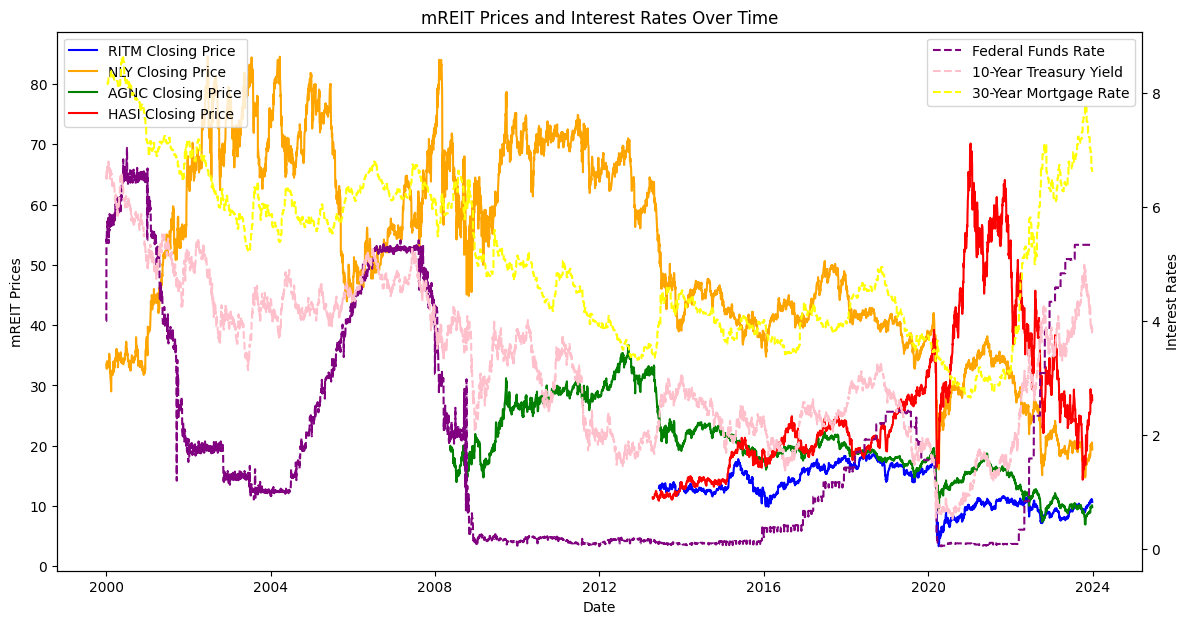

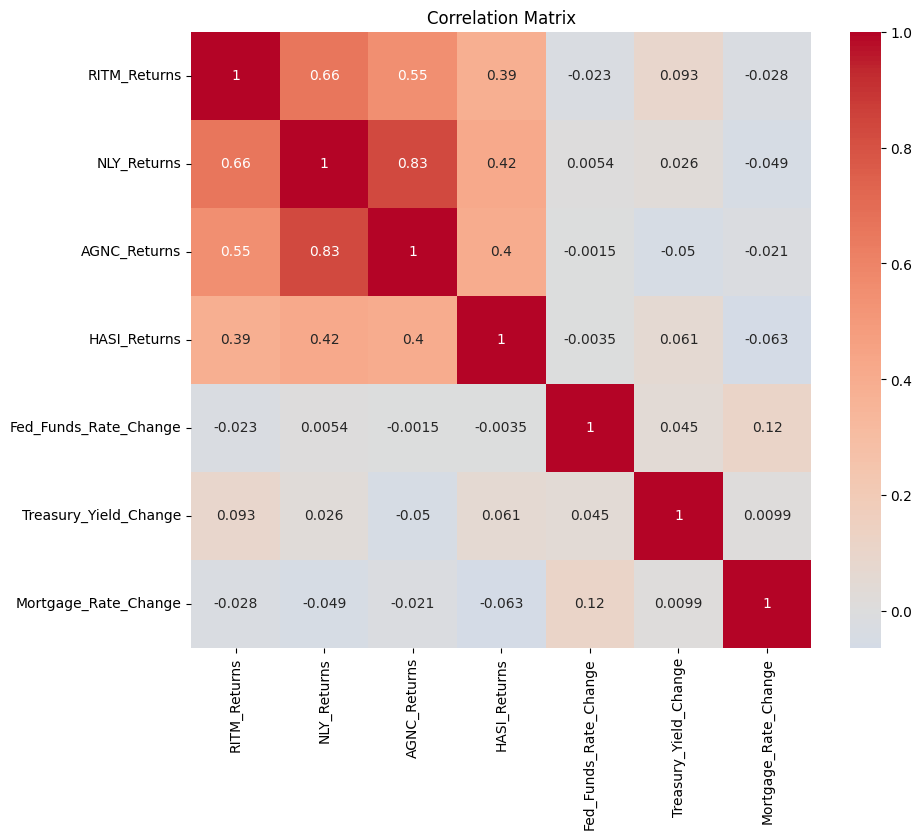

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn for heatmaps and other advanced visualizations

# Calculate correlation matrix if not already calculated
correlation_matrix = merged_data.corr()

# Plot mREIT closing prices with interest rates over time
fig, ax1 = plt.subplots(figsize=(14, 7))

# mREIT Prices on primary y-axis
ax1.plot(ritm['Close'], label='RITM Closing Price', color='blue')
ax1.plot(nly['Close'], label='NLY Closing Price', color='orange')
ax1.plot(agnc['Close'], label='AGNC Closing Price', color='green')
ax1.plot(hasi['Close'], label='HASI Closing Price', color='red')
ax1.set_xlabel('Date')
ax1.set_ylabel('mREIT Prices')
ax1.legend(loc='upper left')

# Interest Rates on secondary y-axis
ax2 = ax1.twinx()
ax2.plot(ffr_resampled['DFF'], label='Federal Funds Rate', linestyle='--', color='purple')
ax2.plot(treasury_yield['DGS10'], label='10-Year Treasury Yield', linestyle='--', color='pink')
ax2.plot(mortgage_rate['MORTGAGE30US'], label='30-Year Mortgage Rate', linestyle='--', color='yellow')
ax2.set_ylabel('Interest Rates')
ax2.legend(loc='upper right')

plt.title('mREIT Prices and Interest Rates Over Time')
plt.show()

# Plot correlations
plt.figure(figsize=(10, 8))
plt.title('Correlation Matrix')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.show()


## * Phase 4 - Modeling and Analysis

In [19]:
import numpy as np
import statsmodels.api as sm
import pandas as pd

# Step 1: Define the independent variable (e.g., Treasury Yield Change) and add a constant
X = treasury_yield[['Pct_Change']].rename(columns={'Pct_Change': 'X_Pct_Change'})  # Rename to avoid duplication
X = sm.add_constant(X)

# Step 2: Define the dependent variable (e.g., RITM Returns)
y = ritm[['Pct_Change']].rename(columns={'Pct_Change': 'y_Pct_Change'})  # Rename to avoid duplication

# Step 3: Combine X and y into a single DataFrame to ensure consistent cleaning
data = pd.concat([X, y], axis=1)

# Step 4: Drop rows with NaN or infinite values in any column
data_clean = data.replace([np.inf, -np.inf], np.nan).dropna()

# Step 5: Inspect the column names after cleaning
print("Columns in data_clean:", data_clean.columns)

# Step 6: Separate the cleaned data back into X and y
X_clean = data_clean[['const', 'X_Pct_Change']]  # Use the renamed independent variable
y_clean = data_clean['y_Pct_Change']  # Use the renamed dependent variable

# Step 7: Verify the shapes
print("Shape of X_clean:", X_clean.shape)  # Should be (2655, 2)
print("Shape of y_clean:", y_clean.shape)  # Should be (2655,)

# Step 8: Fit the model
model = sm.OLS(y_clean, X_clean).fit()

# Step 9: Print the summary of the regression
print(model.summary())


Columns in data_clean: Index(['const', 'X_Pct_Change', 'y_Pct_Change'], dtype='object')
Shape of X_clean: (2655, 2)
Shape of y_clean: (2655,)
                            OLS Regression Results                            
Dep. Variable:           y_Pct_Change   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     22.91
Date:                Sat, 07 Sep 2024   Prob (F-statistic):           1.79e-06
Time:                        00:48:24   Log-Likelihood:                 5974.5
No. Observations:                2655   AIC:                        -1.194e+04
Df Residuals:                    2653   BIC:                        -1.193e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025

In [20]:
##Multiple Linear Algebra with All Interest Rates
# Step 1: Define the independent variables (e.g., multiple interest rate changes)
X = pd.DataFrame({
    'Fed_Funds_Rate_Change': ffr_resampled['Pct_Change'],
    'Treasury_Yield_Change': treasury_yield['Pct_Change'],
    'Mortgage_Rate_Change': mortgage_rate['Pct_Change']
})

# Step 2: Add a constant to the independent variables
X = sm.add_constant(X)

# Step 3: Define the dependent variable (e.g., RITM Returns)
y = ritm['Pct_Change']

# Step 4: Combine X and y into a single DataFrame to ensure consistent cleaning
data = pd.concat([X, y], axis=1)

# Step 5: Drop rows with NaN or infinite values in any column
data_clean = data.replace([np.inf, -np.inf], np.nan).dropna()

# Step 6: Separate the cleaned data back into X and y
X_clean = data_clean[['const', 'Fed_Funds_Rate_Change', 'Treasury_Yield_Change', 'Mortgage_Rate_Change']]
y_clean = data_clean['Pct_Change']

# Step 7: Verify the shapes
print("Shape of X_clean:", X_clean.shape)  # Should match the number of observations and number of variables
print("Shape of y_clean:", y_clean.shape)  # Should be (number of observations,)

# Step 8: Fit the multiple regression model
model = sm.OLS(y_clean, X_clean).fit()

# Step 9: Print the summary of the regression
print(model.summary())


Shape of X_clean: (2654, 4)
Shape of y_clean: (2654,)
                            OLS Regression Results                            
Dep. Variable:             Pct_Change   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     8.929
Date:                Sat, 07 Sep 2024   Prob (F-statistic):           6.94e-06
Time:                        00:48:25   Log-Likelihood:                 5973.8
No. Observations:                2654   AIC:                        -1.194e+04
Df Residuals:                    2650   BIC:                        -1.192e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             Pct_Change   No. Observations:                 2655
Model:                 ARIMA(1, 1, 1)   Log Likelihood                5959.458
Date:                Sat, 07 Sep 2024   AIC                         -11912.916
Time:                        00:48:31   BIC                         -11895.264
Sample:                             0   HQIC                        -11906.527
                               - 2655                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0490      0.005      9.380      0.000       0.039       0.059
ma.L1         -1.0000      0.047    -21.468      0.000      -1.091      -0.909
sigma2         0.0007   3.07e-05     21.314      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


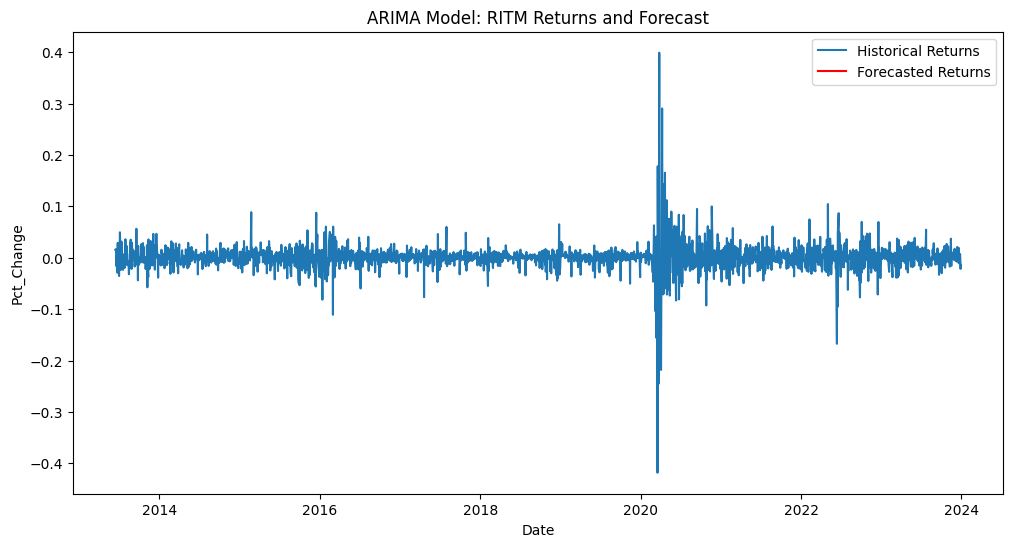

In [21]:
##Time-Series Analysis
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA  # Ensure ARIMA is imported
import matplotlib.pyplot as plt

# Step 1: Prepare the dependent variable (RITM Returns)
# Drop any NaN values to ensure a clean time series
y_clean = ritm['Pct_Change'].dropna()

# Step 2: Fit an ARIMA model
# The order parameter (p, d, q) needs to be determined. We'll start with (1, 1, 1) as an initial guess.
model = ARIMA(y_clean, order=(1, 1, 1))
model_fit = model.fit()

# Step 3: Print the summary of the model
print(model_fit.summary())

# Step 4: Plot the forecast
# Forecast the next 20 steps
forecast = model_fit.get_forecast(steps=20)
forecast_index = pd.date_range(start=y_clean.index[-1], periods=20, freq='B')  # Business days
forecast_series = pd.Series(forecast.predicted_mean, index=forecast_index)

# Plot the historical data along with the forecast
plt.figure(figsize=(12, 6))
plt.plot(y_clean, label='Historical Returns')
plt.plot(forecast_series, label='Forecasted Returns', color='red')
plt.title('ARIMA Model: RITM Returns and Forecast')
plt.xlabel('Date')
plt.ylabel('Pct_Change')
plt.legend()


<ipython-input-22-5da7feb1174f>:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ritm = ritm.fillna(method='ffill')  # Forward-fill to handle any gaps
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:             Pct_Change   No. Observations:                 2751
Model:                 ARIMA(1, 1, 1)   Log Likelihood                6202.821
Date:                Sat, 07 Sep 2024   AIC                         -12399.642
Time:                        00:48:40   BIC                         -12381.884
Sample:                    06-14-2013   HQIC                        -12393.226
                         - 12-29-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0652      0.005     13.096      0.000       0.055       0.075
ma.L1         -1.0000      0.026    -37.772      0.000      -1.052      -0.948
sigma2         0.0006   1.73e-05     37.069      0.0

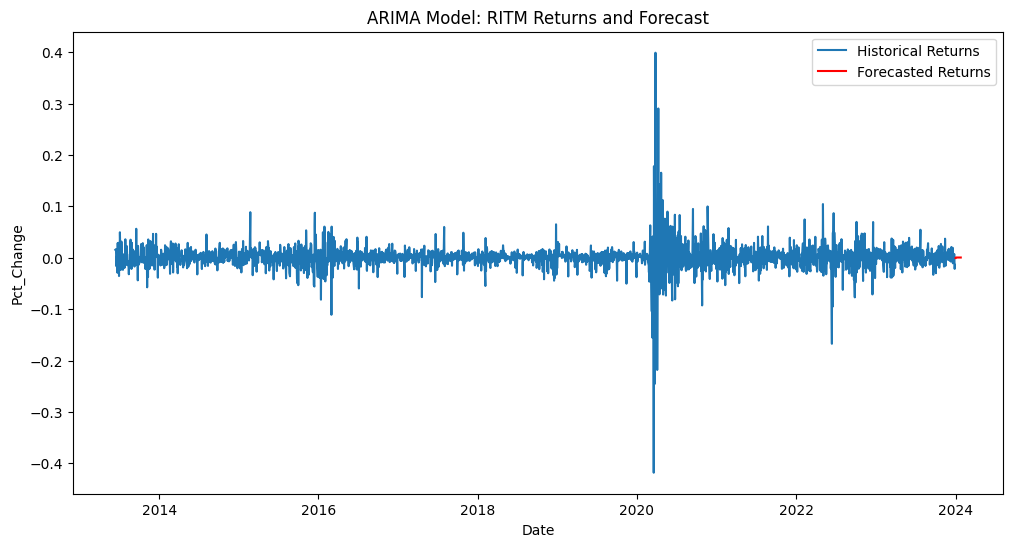

In [22]:
##Set Data Index and refit ARIMA Model

# Step 1: Ensure the time series has a proper datetime index
ritm.index = pd.to_datetime(ritm.index)  # Convert index to datetime if not already

# Step 2: Reindex to enforce the frequency, filling any missing dates if necessary
ritm = ritm.asfreq('B')  # Set frequency to business days (B)
ritm = ritm.fillna(method='ffill')  # Forward-fill to handle any gaps

# Step 3: Prepare the dependent variable (RITM Returns)
y_clean = ritm['Pct_Change'].dropna()

# Step 4: Fit an ARIMA model
model = ARIMA(y_clean, order=(1, 1, 1))
model_fit = model.fit()

# Step 5: Print the summary of the model
print(model_fit.summary())

# Step 6: Plot the forecast with correct datetime index
forecast = model_fit.get_forecast(steps=20)
forecast_index = pd.date_range(start=y_clean.index[-1], periods=20, freq='B')
forecast_series = pd.Series(forecast.predicted_mean, index=forecast_index)

# Plot the historical data along with the forecast
plt.figure(figsize=(12, 6))
plt.plot(y_clean, label='Historical Returns')
plt.plot(forecast_series, label='Forecasted Returns', color='red')
plt.title('ARIMA Model: RITM Returns and Forecast')
plt.xlabel('Date')
plt.ylabel('Pct_Change')
plt.legend()
plt.show()


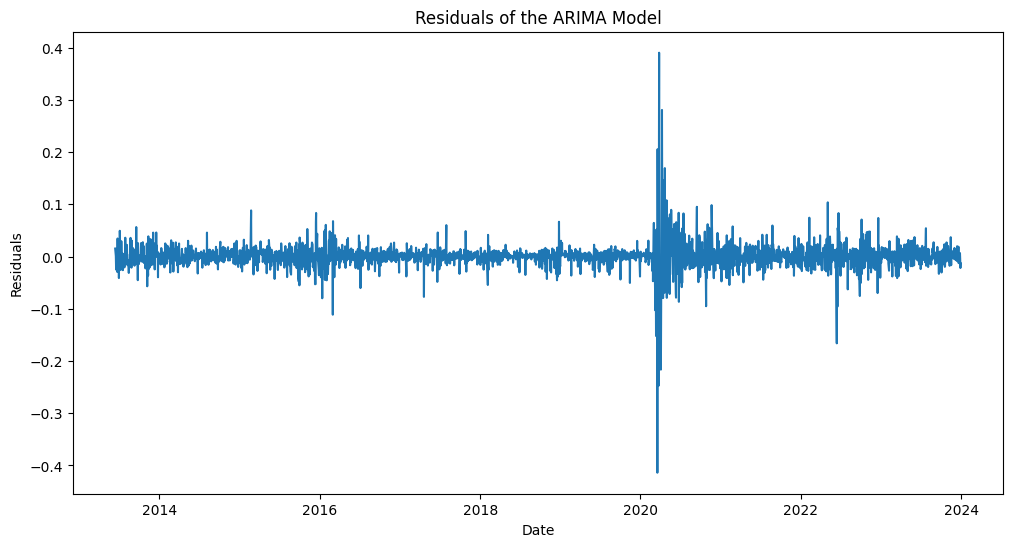

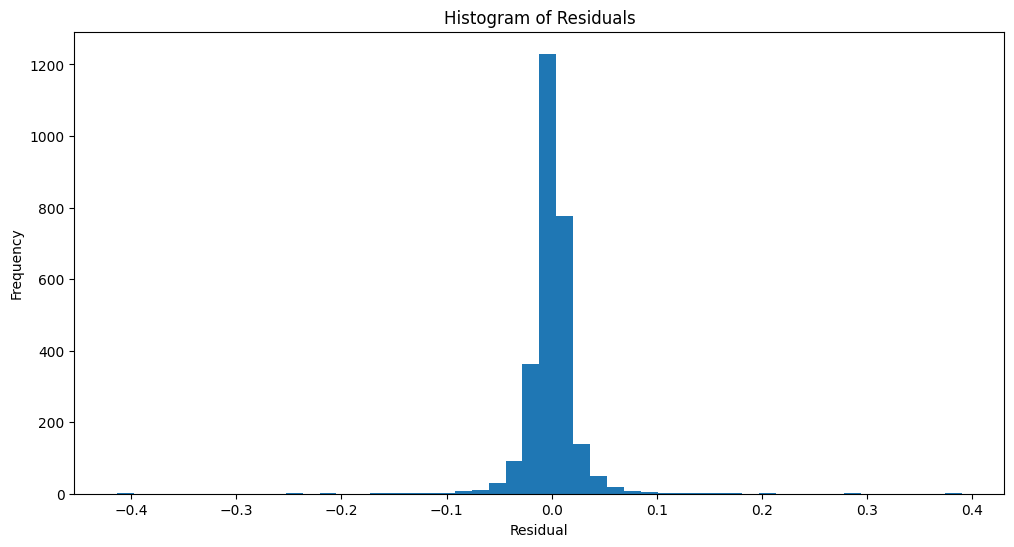

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:         Log_Pct_Change   No. Observations:                 2751
Model:                 ARIMA(1, 1, 1)   Log Likelihood                6132.892
Date:                Sat, 07 Sep 2024   AIC                         -12259.784
Time:                        00:48:50   BIC                         -12242.026
Sample:                    06-14-2013   HQIC                        -12253.368
                         - 12-29-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0551      0.005     11.492      0.000       0.046       0.064
ma.L1         -0.9999      0.013    -79.275      0.000      -1.025      -0.975
sigma2         0.0007   8.17e-06     82.626      0.0

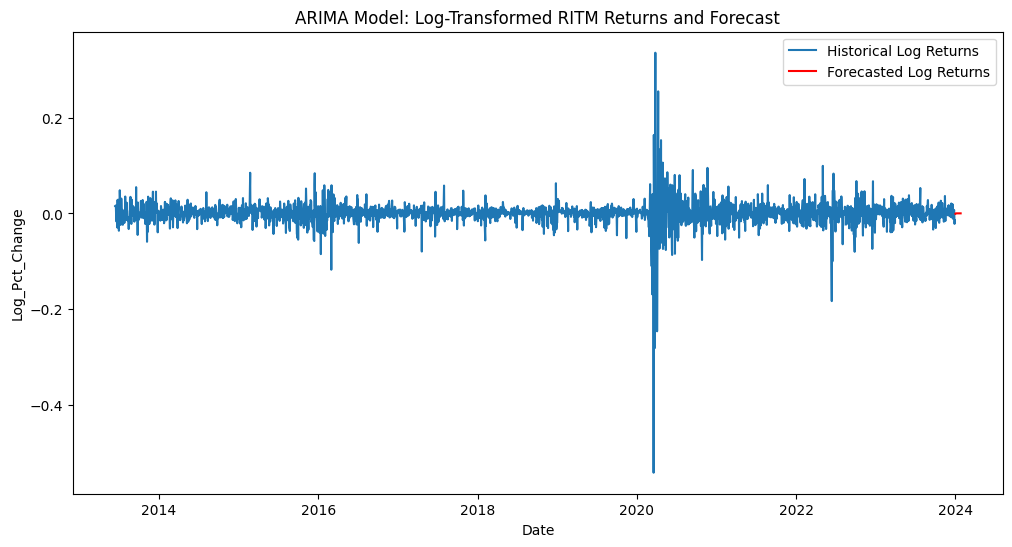

In [23]:
import matplotlib.pyplot as plt

# Plot the residuals of the ARIMA model
residuals = model_fit.resid
plt.figure(figsize=(12, 6))
plt.plot(residuals)
plt.title('Residuals of the ARIMA Model')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.show()

# Histogram of residuals to check for normality
plt.figure(figsize=(12, 6))
plt.hist(residuals, bins=50)
plt.title('Histogram of Residuals')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()


# Apply log transformation to stabilize variance
ritm['Log_Pct_Change'] = np.log1p(ritm['Pct_Change'])

# Prepare the dependent variable with log transformation
y_log_clean = ritm['Log_Pct_Change'].dropna()

# Fit the ARIMA model on log-transformed data
model_log = ARIMA(y_log_clean, order=(1, 1, 1))
model_log_fit = model_log.fit()

# Print the summary of the log-transformed model
print(model_log_fit.summary())

# Plot the forecast
forecast_log = model_log_fit.get_forecast(steps=20)
forecast_log_series = pd.Series(forecast_log.predicted_mean, index=forecast_index)

plt.figure(figsize=(12, 6))
plt.plot(y_log_clean, label='Historical Log Returns')
plt.plot(forecast_log_series, label='Forecasted Log Returns', color='red')
plt.title('ARIMA Model: Log-Transformed RITM Returns and Forecast')
plt.xlabel('Date')
plt.ylabel('Log_Pct_Change')
plt.legend()
plt.show()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.4/983.4 kB 26.3 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0006423. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:      1,   Func. Count:      6,   Neg. LLF: 424608713.63728607
Iteration:      2,   Func. Count:     18,   Neg. LLF: 8.580402295139103e+23
Iteration:      3,   Func. Count:     33,   Neg. LLF: 4.81925874406654e+23
Iteration:      4,   Func. Count:     48,   Neg. LLF: 7.10373139258745e+17
Iteration:      5,   Func. Count:     60,   Neg. LLF: 3740265106908.6997
Iteration:      6,   Func. Count:     74,   Neg. LLF: -7310.119810158934
Optimization terminated successfully    (Exit mode 0)
            Current function value: -7310.119834153732
            Iterations: 10
            Function evaluations: 74
            Gradient evaluations: 6
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                7310.12
Distribution:                 

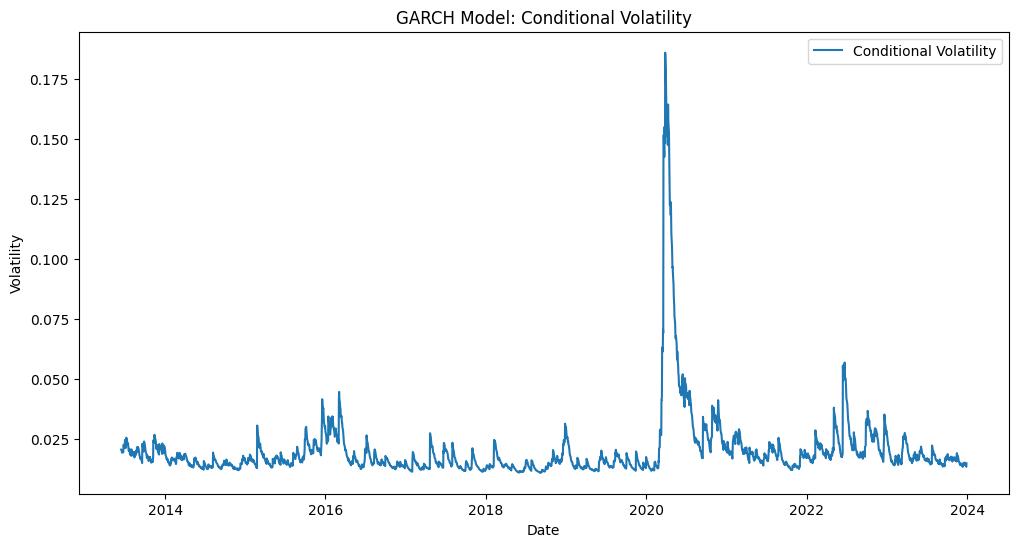

In [24]:
#GARCH Model
!pip install arch
from arch import arch_model

# Fit a GARCH(1,1) model to the residuals
garch_model = arch_model(residuals, vol='Garch', p=1, q=1)
garch_fit = garch_model.fit()

# Print the summary of the GARCH model
print(garch_fit.summary())

# Plot the volatility (standard deviation) from the GARCH model
plt.figure(figsize=(12, 6))
plt.plot(garch_fit.conditional_volatility, label='Conditional Volatility')
plt.title('GARCH Model: Conditional Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()


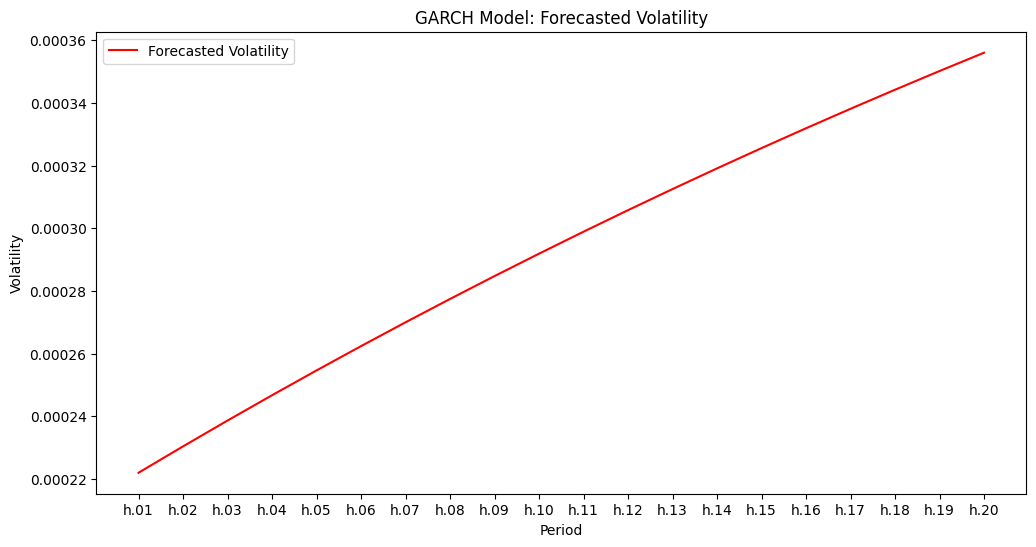

In [25]:
##Volatility Forecasting
# Forecast volatility for the next 20 periods
vol_forecast = garch_fit.forecast(horizon=20)

# Extract the forecasted conditional volatility
forecasted_volatility = vol_forecast.variance[-1:]

# Plot the forecasted volatility
plt.figure(figsize=(12, 6))
plt.plot(forecasted_volatility.T, label='Forecasted Volatility', color='red')
plt.title('GARCH Model: Forecasted Volatility')
plt.xlabel('Period')
plt.ylabel('Volatility')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0       -28.13      -28.12   6.095e-13      -28.12
1       -28.18      -28.13   5.788e-13      -28.16
2       -28.23      -28.15   5.516e-13      -28.20
3       -28.24      -28.13   5.449e-13      -28.20
4       -28.29      -28.14   5.188e-13      -28.23
5       -28.36      -28.17   4.841e-13      -28.29
6       -28.44      -28.22   4.473e-13      -28.36
7       -28.49     -28.24*   4.237e-13      -28.40
8       -28.51      -28.22   4.152e-13     -28.41*
9       -28.52      -28.20   4.105e-13      -28.41
10      -28.53      -28.17   4.087e-13      -28.40
11      -28.54      -28.15   4.042e-13      -28.40
12      -28.54      -28.12   4.023e-13      -28.39
13     -28.55*      -28.09  3.990e-13*      -28.38
14      -28.54      -28.05   4.010e-13      -28.37
15      -28.55      -28.02   4.009e-13      -28.35
-------------------------------

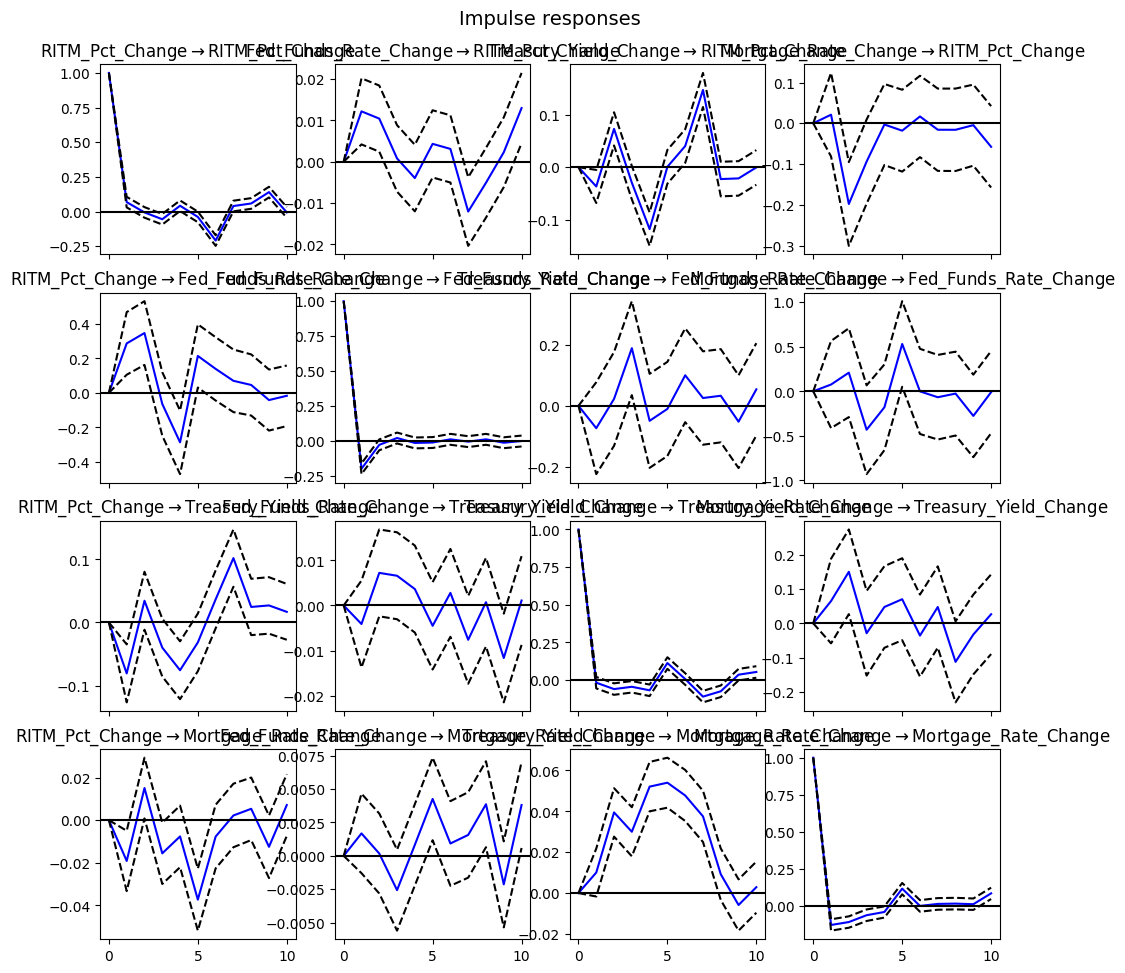

<Figure size 1200x600 with 0 Axes>

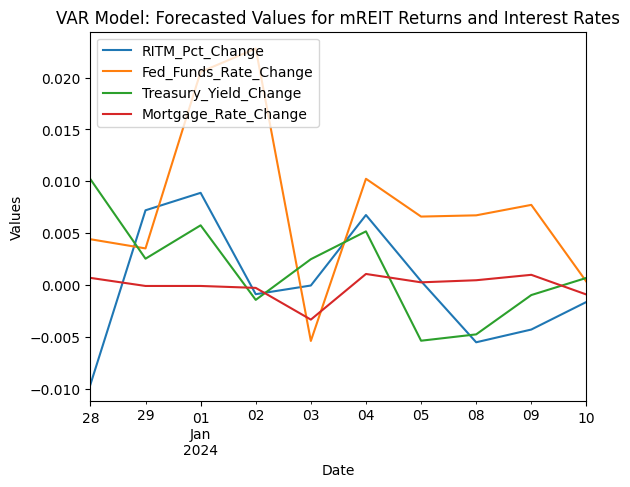

            RITM_Pct_Change  Fed_Funds_Rate_Change  Treasury_Yield_Change  \
2023-12-28        -0.009600               0.004410               0.010198   
2023-12-29         0.007200               0.003525               0.002533   
2024-01-01         0.008884               0.020539               0.005752   
2024-01-02        -0.000890               0.022800              -0.001438   
2024-01-03        -0.000052              -0.005398               0.002484   
2024-01-04         0.006745               0.010240               0.005168   
2024-01-05         0.000367               0.006595              -0.005376   
2024-01-08        -0.005526               0.006714              -0.004764   
2024-01-09        -0.004298               0.007723              -0.000973   
2024-01-10        -0.001639               0.000316               0.000680   

            Mortgage_Rate_Change  
2023-12-28              0.000683  
2023-12-29             -0.000097  
2024-01-01             -0.000096  
2024-01-02  

In [26]:
##VAR Model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.api import VAR

# Step 1: Data Preparation

# Function to check stationarity and apply differencing if necessary
def check_stationarity(series, max_diff=2):
    for i in range(max_diff):
        p_value = adfuller(series.dropna())[1]
        if p_value > 0.05:
            series = series.diff().dropna()
        else:
            break
    return series

# Assuming you have these variables: ritm['Pct_Change'], ffr_resampled['Pct_Change'], treasury_yield['Pct_Change'], mortgage_rate['Pct_Change']
# Ensure these variables are defined as needed before running the code

# Apply stationarity check to each series
ritm_diff = check_stationarity(ritm['Pct_Change'])
ffr_diff = check_stationarity(ffr_resampled['Pct_Change'])
treasury_diff = check_stationarity(treasury_yield['Pct_Change'])
mortgage_diff = check_stationarity(mortgage_rate['Pct_Change'])

# Combine the series into a DataFrame
data = pd.concat([ritm_diff, ffr_diff, treasury_diff, mortgage_diff], axis=1)
data.columns = ['RITM_Pct_Change', 'Fed_Funds_Rate_Change', 'Treasury_Yield_Change', 'Mortgage_Rate_Change']

# Handle any NaN or Inf values by dropping them
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.dropna(inplace=True)

# Step 2: Model Selection

# Select the optimal lag order using Akaike Information Criterion (AIC)
model = VAR(data)
lag_order = model.select_order(maxlags=15)
print(lag_order.summary())

# Choose the lag order based on the lowest AIC value
optimal_lag = lag_order.aic
print(f"Optimal Lag Order: {optimal_lag}")

# Step 3: Fit the VAR Model

# Fit the VAR model with the optimal lag order
var_model = model.fit(optimal_lag)
print(var_model.summary())

# Step 4: Impulse Response Analysis

# Generate the impulse response function (IRF) for the model
irf = var_model.irf(10)  # Forecast 10 periods ahead
irf.plot(orth=False)
plt.show()

# Step 5: Forecasting

# Forecast the next 10 periods
forecast = var_model.forecast(data.values[-optimal_lag:], steps=10)
forecast_df = pd.DataFrame(forecast, index=pd.date_range(start=data.index[-1], periods=10, freq='B'),
                           columns=data.columns)

# Plot the forecasted values
plt.figure(figsize=(12, 6))
forecast_df.plot()
plt.title('VAR Model: Forecasted Values for mREIT Returns and Interest Rates')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend(loc='upper left')
plt.show()

# Optional: Display the forecasted data
print(forecast_df)


In [27]:
# #Scenario Analysis
# import numpy as np
# # Updated Scenario Analysis
# def apply_scenario(var_model, scenario, steps=10):
#     # Initialize with the last known value from the original data
#     last_values = data.values[-var_model.k_ar:]
#     simulated_data = []

#     for step in range(steps):
#         # Apply the scenario to the last_values
#         last_values = np.dot(last_values, var_model.coefs) + scenario
#         simulated_data.append(last_values[-1])  # Store the last period's results

#     return np.array(simulated_data)

# # Define your custom scenarios
# scenario_1 = np.array([0.01, 0.02, -0.01, 0.03])  # Example: scenario of small changes
# scenario_2 = np.array([-0.02, 0.01, 0.02, -0.01])  # Example: opposite changes
# scenario_3 = np.array([0.03, 0.03, 0.03, 0.03])  # Example: all increase

# # Apply the scenarios
# simulated_scenario_1 = apply_scenario(var_model, scenario_1)
# simulated_scenario_2 = apply_scenario(var_model, scenario_2)
# simulated_scenario_3 = apply_scenario(var_model, scenario_3)

# # Convert to DataFrame for better visualization
# scenarios_df = pd.DataFrame({
#     'Scenario 1': simulated_scenario_1[:, 0],
#     'Scenario 2': simulated_scenario_2[:, 0],
#     'Scenario 3': simulated_scenario_3[:, 0]
# }, index=pd.date_range(start=data.index[-1], periods=len(simulated_scenario_1), freq='B'))

# # Display the custom scenario outcomes
# print(scenarios_df)


In [28]:
# import matplotlib.pyplot as plt

# # Function to plot the scenario results
# def plot_scenario(simulated_df, title):
#     plt.figure(figsize=(10, 6))
#     for col in simulated_df.columns:
#         plt.plot(simulated_df[col], label=col)
#     plt.title(title)
#     plt.xlabel('Steps')
#     plt.ylabel('Change')
#     plt.legend()
#     plt.show()

# # Plot the results of each scenario
# plot_scenario(simulated_scenario_1, 'Scenario 1: Sharp Increase in Fed Funds Rate')
# plot_scenario(simulated_scenario_2, 'Scenario 2: Decrease in Treasury Yield')
# plot_scenario(simulated_scenario_3, 'Scenario 3: Combined Impact')


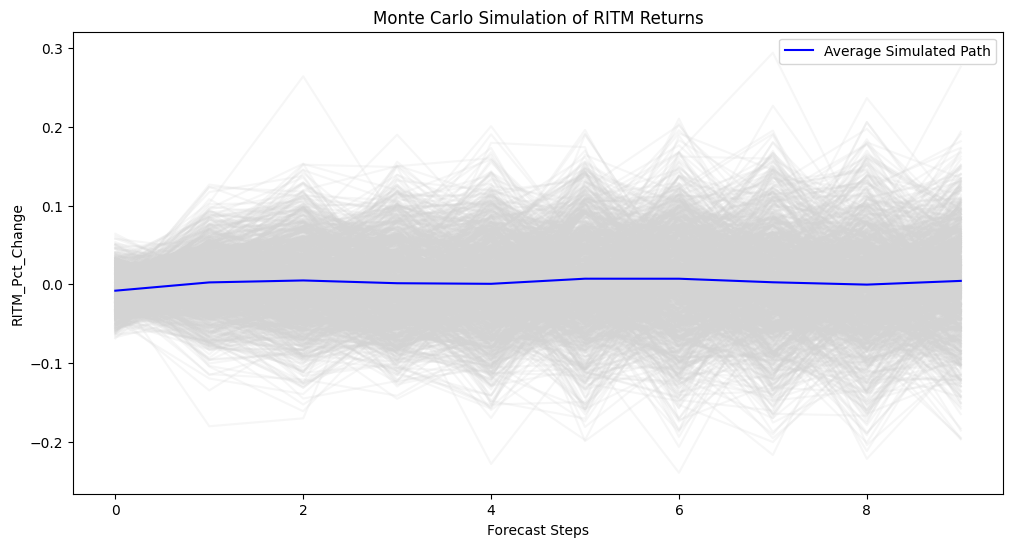

                           Mean  Standard Deviation       Min       Max
RITM_Pct_Change        0.002176            0.004429 -0.008130  0.007112
Fed_Funds_Rate_Change  0.006558            0.003971  0.001072  0.013615
Treasury_Yield_Change  0.000551            0.002076 -0.003033  0.003597
Mortgage_Rate_Change   0.000741            0.004611 -0.005348  0.010770


In [29]:
# Step 4: Monte Carlo Simulation
def monte_carlo_simulation(var_model, num_simulations=1000, steps=10):
    # Get the last observed data point as the starting point for simulation
    last_observation = data.values[-var_model.k_ar:]

    # Extract the intercept (first row of params)
    intercept = var_model.params.iloc[0].values

    # Store the simulated paths
    simulations = []

    for i in range(num_simulations):
        # Generate random errors from a normal distribution with the same covariance as the residuals
        errors = np.random.multivariate_normal(mean=np.zeros(var_model.neqs), cov=var_model.sigma_u, size=steps)

        # Initialize the simulated path with the last observation
        simulated_path = last_observation.copy()

        for step in range(steps):
            # Start with the intercept
            forecast = intercept.copy()

            # Add contributions from each lag
            for lag in range(1, var_model.k_ar + 1):
                forecast += np.dot(simulated_path[-lag], var_model.coefs[lag - 1])

            # Add the error term
            simulated_step = forecast + errors[step]

            # Append the forecasted step to the simulated path
            simulated_path = np.vstack([simulated_path, simulated_step])

        # Store only the forecasted steps (excluding the initial conditions)
        simulations.append(simulated_path[-steps:])

    return np.array(simulations)

# Run Monte Carlo simulations
num_simulations = 1000  # Number of simulations
steps = 10  # Number of forecast steps
monte_carlo_results = monte_carlo_simulation(var_model, num_simulations=num_simulations, steps=steps)

# Convert the results to a DataFrame for analysis
monte_carlo_df = pd.DataFrame(monte_carlo_results.mean(axis=0), columns=data.columns)

# Plot the Monte Carlo simulation results
plt.figure(figsize=(12, 6))
for i in range(num_simulations):
    plt.plot(monte_carlo_results[i, :, 0], color='lightgray', alpha=0.2)  # Plot each simulation path

plt.plot(monte_carlo_df['RITM_Pct_Change'], color='blue', label='Average Simulated Path')
plt.title('Monte Carlo Simulation of RITM Returns')
plt.xlabel('Forecast Steps')
plt.ylabel('RITM_Pct_Change')
plt.legend()
plt.show()

# Display summary statistics of the simulations
monte_carlo_summary = pd.DataFrame({
    'Mean': monte_carlo_df.mean(),
    'Standard Deviation': monte_carlo_df.std(),
    'Min': monte_carlo_df.min(),
    'Max': monte_carlo_df.max(),
})
print(monte_carlo_summary)

In [30]:
# print("Shape of var_model.params:", var_model.params.shape)
# print("First few rows of var_model.params:")
# print(var_model.params[:5])


# print("Shape of data:", data.shape)
# print("Columns in data:", data.columns)
# print("First few rows of data:")
# print(data.head())


# print("Shape of var_model.coefs:", var_model.coefs.shape)
# print("First few elements of var_model.coefs:")
# print(var_model.coefs[:5])


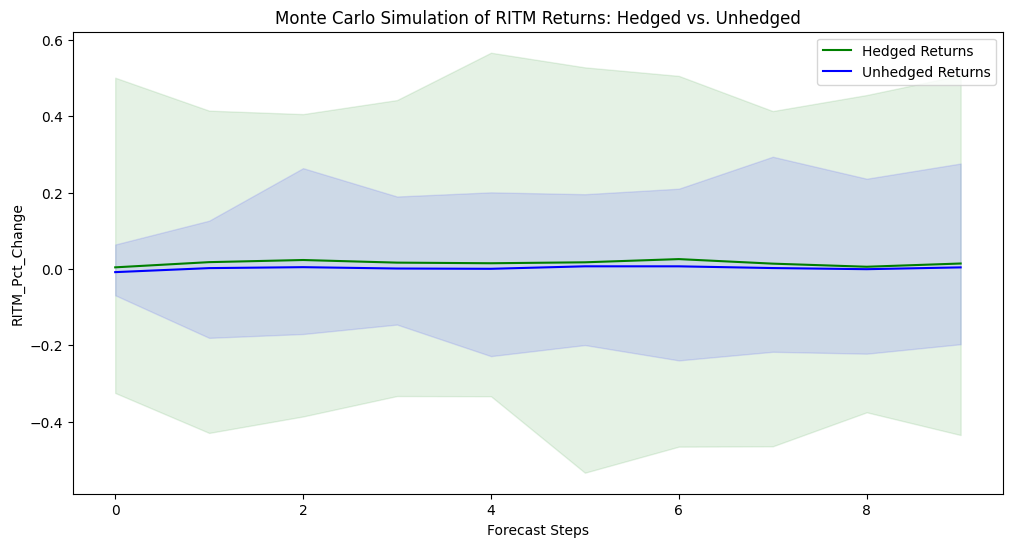

In [31]:
##Defining Hedging Strategies - Interest Rate Swaps

# Step 1: Define Swap Parameters
notional_amount = 1000000  # Assume a $1,000,000 notional amount
fixed_rate = 0.02  # Assume a fixed rate of 2%

# Step 2: Calculate the Swap Payments
def simulate_swap(floating_rates, fixed_rate, notional_amount):
    # Calculate the floating rate payments (notional * floating rate)
    floating_payments = floating_rates * notional_amount

    # Calculate the fixed rate payments (notional * fixed rate)
    fixed_payments = fixed_rate * notional_amount

    # Net effect of the swap (fixed - floating)
    swap_effect = fixed_payments - floating_payments

    return swap_effect

# Since monte_carlo_results is an array, we need to access the columns by index
# Assuming RITM_Pct_Change is the first column (index 0) and Fed_Funds_Rate_Change is the second column (index 1)
ritm_pct_change = monte_carlo_results[:, :, 0]
floating_rates = monte_carlo_results[:, :, 1]  # Fed_Funds_Rate_Change

# Apply the swap to the Monte Carlo simulation results
swap_effects = simulate_swap(floating_rates, fixed_rate, notional_amount)

# Adjust RITM returns by the swap effects
hedged_returns = ritm_pct_change + swap_effects / notional_amount

# Plot the hedged vs. unhedged returns
plt.figure(figsize=(12, 6))
plt.plot(np.mean(hedged_returns, axis=0), label='Hedged Returns', color='green')
plt.plot(np.mean(ritm_pct_change, axis=0), label='Unhedged Returns', color='blue')
plt.fill_between(range(hedged_returns.shape[1]), np.min(hedged_returns, axis=0), np.max(hedged_returns, axis=0), color='green', alpha=0.1)
plt.fill_between(range(ritm_pct_change.shape[1]), np.min(ritm_pct_change, axis=0), np.max(ritm_pct_change, axis=0), color='blue', alpha=0.1)
plt.title('Monte Carlo Simulation of RITM Returns: Hedged vs. Unhedged')
plt.xlabel('Forecast Steps')
plt.ylabel('RITM_Pct_Change')
plt.legend()
plt.show()

Stress Test Results:
                       Severe Rate Hike  Severe Rate Cut  Mixed Scenario
RITM_Pct_Change               -0.021672        -0.021689       -0.020770
Fed_Funds_Rate_Change         -0.003902         0.003902        0.000276
Treasury_Yield_Change          0.013811         0.012574        0.014640
Mortgage_Rate_Change          -0.010750        -0.007241       -0.011664


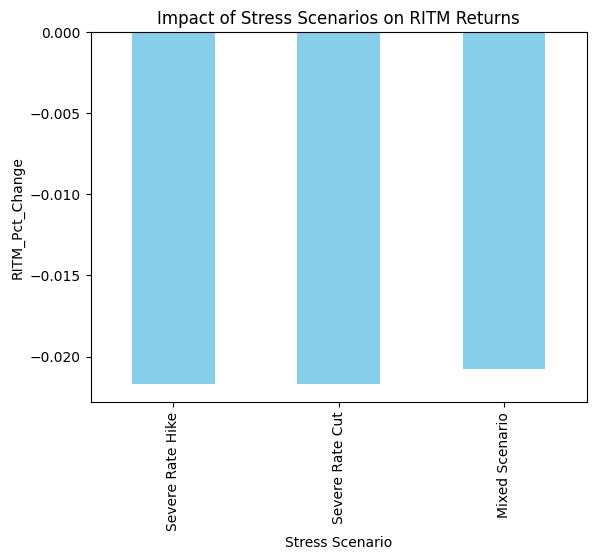

In [32]:
##Stress Test Analysis

# Step 1: Define Stress Scenarios
stress_scenarios = {
    'Severe Rate Hike': np.array([0, 0.02, 0.015, 0.015]),
    'Severe Rate Cut': np.array([0, -0.02, -0.015, -0.015]),
    'Mixed Scenario': np.array([0, 0.01, -0.01, 0.02])
}

# Function to apply stress scenario
def apply_stress_scenario(var_model, initial_values, stress_scenario):
    coefs = var_model.coefs[0]  # Use only the first lag coefficient matrix
    stress_effects = np.dot(coefs, stress_scenario)
    stressed_values = initial_values + stress_effects
    return stressed_values

# Step 2: Apply the Stress Scenarios and Collect Results
stress_test_results = {}
initial_values = data.iloc[-1, :]  # Use the last observed values from the dataset as the initial state

for scenario_name, stress_scenario in stress_scenarios.items():
    stressed_returns = apply_stress_scenario(var_model, initial_values, stress_scenario)
    stress_test_results[scenario_name] = stressed_returns

# Convert results to a DataFrame for better visualization
stress_test_df = pd.DataFrame(stress_test_results, index=data.columns)

# Step 3: Analyze the Results
print("Stress Test Results:")
print(stress_test_df)

# Optional: Plot the stress test outcomes for RITM returns
stress_test_df.loc['RITM_Pct_Change'].plot(kind='bar', color='skyblue')
plt.title('Impact of Stress Scenarios on RITM Returns')
plt.ylabel('RITM_Pct_Change')
plt.xlabel('Stress Scenario')
plt.show()


## * Phase 5 - Data Visualization Preparation and Launch

In [33]:
## mREITs Daily Data
# Concatenate the necessary columns from each mREIT DataFrame
mreits_data = pd.concat([
    ritm[['Close', 'Pct_Change', '30_day_MA']],
    nly[['Close', 'Pct_Change', '30_day_MA']],
    agnc[['Close', 'Pct_Change', '30_day_MA']],
    hasi[['Close', 'Pct_Change', '30_day_MA']]
], axis=1)

# Rename columns for clarity
mreits_data.columns = [
    'RITM_Close', 'RITM_Pct_Change', 'RITM_30_day_MA',
    'NLY_Close', 'NLY_Pct_Change', 'NLY_30_day_MA',
    'AGNC_Close', 'AGNC_Pct_Change', 'AGNC_30_day_MA',
    'HASI_Close', 'HASI_Pct_Change', 'HASI_30_day_MA'
]

# Save the DataFrame to a CSV file
mreits_data.to_csv('mreits_daily_data.csv', index=True)

print("mREITs Daily Data saved as 'mreits_daily_data.csv'")

# from google.colab import files

# # # Download the CSV file
# # files.download('mreits_daily_data.csv')

mREITs Daily Data saved as 'mreits_daily_data.csv'


In [34]:
## Interest Rates Data

# Assuming the interest rates data was stored in the variables `ffr_resampled`, `treasury_yield`, and `mortgage_rate`
# We will concatenate these into a single DataFrame

interest_rates_data = pd.concat([
    ffr_resampled['Pct_Change'],
    treasury_yield['Pct_Change'],
    mortgage_rate['Pct_Change']
], axis=1)

# Rename the columns for clarity
interest_rates_data.columns = [
    'Fed_Funds_Rate_Change',
    'Treasury_Yield_Change',
    'Mortgage_Rate_Change'
]

# Save the DataFrame to a CSV file
interest_rates_data.to_csv('interest_rates_data.csv', index=True)

print("Interest Rates Data saved as 'interest_rates_data.csv'")

# from google.colab import files

# # Download the CSV file
# files.download('interest_rates_data.csv')

Interest Rates Data saved as 'interest_rates_data.csv'


In [35]:
# Assuming `ritm` is your original mREITs dataset
ritm_data = ritm[['Adj Close']].copy()
ritm_data['Pct_Change'] = ritm_data['Adj Close'].pct_change().dropna()

# Save RITM data to a CSV file
ritm_data.to_csv('ritm_daily_data.csv', index=True)

print("RITM data saved as 'ritm_daily_data.csv'")

# Assuming `ffr_resampled`, `treasury_yield`, and `mortgage_rate` are your interest rate datasets
interest_rates_data = pd.concat([
    ffr_resampled['Pct_Change'],
    treasury_yield['Pct_Change'],
    mortgage_rate['Pct_Change']
], axis=1)

interest_rates_data.columns = ['Fed_Funds_Rate_Change', 'Treasury_Yield_Change', 'Mortgage_Rate_Change']

# Save interest rates data to a CSV file
interest_rates_data.to_csv('interest_rates_data.csv', index=True)

print("Interest rates data saved as 'interest_rates_data.csv'")

# Load mREITs data
ritm_data = pd.read_csv('ritm_daily_data.csv', index_col='Date', parse_dates=True)

# Load interest rates data
interest_rates_data = pd.read_csv('interest_rates_data.csv', index_col='DATE', parse_dates=True)

# Ensure both datasets are aligned on the same dates
ritm_data = ritm_data.loc[ritm_data.index.isin(interest_rates_data.index)]
interest_rates_data = interest_rates_data.loc[interest_rates_data.index.isin(ritm_data.index)]

# Merge the datasets on their index (dates)
merged_data = pd.merge(ritm_data, interest_rates_data, left_index=True, right_index=True)

# Save the merged DataFrame to a CSV file
merged_data.to_csv('merged_data_for_modeling.csv', index=True)

print("Merged Data for Modeling saved as 'merged_data_for_modeling.csv'")

# Load the interest rates data and rename the 'DATE' column
interest_rates_data = pd.read_csv('interest_rates_data.csv')

# Rename the 'DATE' column to 'Date'
interest_rates_data.rename(columns={'DATE': 'Date'}, inplace=True)

# Set 'Date' as the index and parse dates
interest_rates_data.set_index('Date', inplace=True)
interest_rates_data.index = pd.to_datetime(interest_rates_data.index)

# Save the corrected interest rates data
interest_rates_data.to_csv('interest_rates_data_corrected.csv')

# Load the corrected interest rates data
interest_rates_data = pd.read_csv('interest_rates_data_corrected.csv', index_col='Date', parse_dates=True)

# Now load the mREITs data
ritm_data = pd.read_csv('ritm_daily_data.csv', index_col='Date', parse_dates=True)

# Merge the datasets on their index (dates)
merged_data = pd.merge(ritm_data, interest_rates_data, left_index=True, right_index=True)

# Save the merged DataFrame to a CSV file
merged_data.to_csv('merged_data_for_modeling.csv', index=True)

print("Merged Data for Modeling saved as 'merged_data_for_modeling.csv'")


RITM data saved as 'ritm_daily_data.csv'
Interest rates data saved as 'interest_rates_data.csv'
Merged Data for Modeling saved as 'merged_data_for_modeling.csv'
Merged Data for Modeling saved as 'merged_data_for_modeling.csv'


In [36]:
## Merged Dataset for Modeling

# Load the interest rates data and rename the 'DATE' column
interest_rates_data = pd.read_csv('interest_rates_data.csv')

# Rename the 'DATE' column to 'Date'
interest_rates_data.rename(columns={'DATE': 'Date'}, inplace=True)

# Set 'Date' as the index and parse dates
interest_rates_data.set_index('Date', inplace=True)
interest_rates_data.index = pd.to_datetime(interest_rates_data.index)

# Save the corrected interest rates data
interest_rates_data.to_csv('interest_rates_data_corrected.csv')

# Load the corrected interest rates data
interest_rates_data = pd.read_csv('interest_rates_data_corrected.csv', index_col='Date', parse_dates=True)

# Now load the mREITs data
ritm_data = pd.read_csv('ritm_daily_data.csv', index_col='Date', parse_dates=True)

# Merge the datasets on their index (dates)
merged_data = pd.merge(ritm_data, interest_rates_data, left_index=True, right_index=True)

# Save the merged DataFrame to a CSV file
merged_data.to_csv('merged_data_for_modeling.csv', index=True)

print("Merged Data for Modeling saved as 'merged_data_for_modeling.csv'")

# from google.colab import files

# # Download the corrected CSV file
# files.download('merged_data_for_modeling.csv')



Merged Data for Modeling saved as 'merged_data_for_modeling.csv'


In [37]:
## VAR Model Forecasts

# Number of steps ahead to forecast
forecast_steps = 10

# Generate the forecasts using the VAR model
var_forecasts = var_model.forecast(data.values[-var_model.k_ar:], steps=forecast_steps)

# Create a DataFrame for the forecasts
forecast_dates = pd.date_range(start=data.index[-1], periods=forecast_steps + 1, freq='B')[1:]
forecast_df = pd.DataFrame(var_forecasts, index=forecast_dates, columns=data.columns)

# Save the forecast DataFrame to a CSV file
forecast_df.to_csv('var_model_forecasts.csv', index=True)

print("VAR Model Forecasts saved as 'var_model_forecasts.csv'")

# from google.colab import files

# # Download the CSV file
# files.download('var_model_forecasts.csv')


VAR Model Forecasts saved as 'var_model_forecasts.csv'


In [38]:
##Monte Carlo Simulation Results

def monte_carlo_simulation(var_model, num_simulations=1000, steps=10):
    """
    Perform Monte Carlo simulation based on a fitted VAR model.

    Parameters:
    - var_model: Fitted VAR model
    - num_simulations: Number of simulations to perform
    - steps: Number of forecast steps for each simulation

    Returns:
    - A numpy array of simulation results with shape (num_simulations, steps * num_variables)
    """
    # Extract coefficients from the model
    coefs = var_model.params.values
    intercepts = coefs[0, :]
    coefs = coefs[1:, :].reshape(-1, coefs.shape[1], coefs.shape[1])

    # Number of variables in the VAR model
    num_variables = coefs.shape[1]

    # Generate random shocks (normal distribution, mean 0, standard deviation 1)
    shocks = np.random.normal(size=(num_simulations, steps, num_variables))

    # Initialize the simulation results array
    simulation_results = np.zeros((num_simulations, steps, num_variables))

    for i in range(num_simulations):
        current_state = np.zeros(num_variables)  # Assuming starting from zero or a neutral state
        for t in range(steps):
            # Apply the VAR coefficients and intercepts
            current_state = intercepts + np.dot(current_state, coefs[t % coefs.shape[0]]) + shocks[i, t, :]
            simulation_results[i, t, :] = current_state

    return simulation_results

# Example usage:
num_simulations = 1000  # Number of simulations
steps = 10  # Number of forecast steps

# Assuming var_model is your fitted VAR model
monte_carlo_results = monte_carlo_simulation(var_model, num_simulations=num_simulations, steps=steps)

# Convert the results to a DataFrame for analysis
monte_carlo_df = pd.DataFrame(monte_carlo_results.reshape(num_simulations * steps, -1),
                              columns=[f'Var_{i+1}' for i in range(monte_carlo_results.shape[2])])

# Save the Monte Carlo results to a CSV file
monte_carlo_df.to_csv('monte_carlo_simulation_results.csv', index=False)

print("Monte Carlo simulation results saved to 'monte_carlo_simulation_results.csv'.")

# from google.colab import files

# # # Download the CSV file
# files.download('monte_carlo_simulation_results.csv')

Monte Carlo simulation results saved to 'monte_carlo_simulation_results.csv'.


In [39]:
## Stress Test Results

def apply_stress_scenario(var_model, initial_values, stress_scenario):
    """
    Apply a stress scenario to the VAR model.

    Parameters:
    - var_model: Fitted VAR model.
    - initial_values: The initial state of the variables (e.g., the most recent observed values).
    - stress_scenario: A vector representing the stress scenario to apply (e.g., [shock to var1, shock to var2, ...]).

    Returns:
    - The stressed values after applying the scenario.
    """
    coefs = var_model.coefs
    intercepts = var_model.intercept  # Access intercepts directly using `intercept`

    # Apply the stress scenario to the coefficients
    stress_effects = np.dot(coefs[0], stress_scenario)

    # Calculate the stressed values by adding the effects to the initial values
    stressed_values = initial_values + stress_effects + intercepts

    return stressed_values

# Example stress scenarios
stress_scenarios = {
    'Severe Rate Hike': np.array([0.05, 0.03, 0.04, 0.02]),  # Example severe hike in rates
    'Severe Rate Cut': np.array([-0.05, -0.03, -0.04, -0.02]),  # Example severe cut in rates
    'Mixed Scenario': np.array([0.02, -0.01, 0.01, -0.02]),  # Example mixed scenario
}

# Assuming `var_model` is your fitted VAR model and `initial_values` is the last observed data point
initial_values = var_model.endog[-1]  # Last observed values

stress_test_results = {}

for scenario_name, stress_scenario in stress_scenarios.items():
    stressed_returns = apply_stress_scenario(var_model, initial_values, stress_scenario)
    stress_test_results[scenario_name] = stressed_returns

# Convert the stress test results to a DataFrame for easier analysis
stress_test_df = pd.DataFrame(stress_test_results, index=[f'Var_{i+1}' for i in range(len(initial_values))])

# Save the stress test results to a CSV file
stress_test_df.to_csv('stress_test_results.csv')

print("Stress test results saved to 'stress_test_results.csv'.")
# from google.colab import files

# # # Download the CSV file
# files.download('stress_test_results.csv')

# print(stress_test_df.head())

Stress test results saved to 'stress_test_results.csv'.


In [40]:
!pip install dash plotly pandas

import dash
import dash_core_components as dcc
import dash_html_components as html
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Initialize the Dash app
app = dash.Dash(__name__)

# Load the data
var_forecasts = pd.read_csv('var_model_forecasts.csv')

# Rename 'Unnamed: 0' to 'Date'
var_forecasts.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)

# Convert 'Date' to datetime
var_forecasts['Date'] = pd.to_datetime(var_forecasts['Date'])

# Create the line plot
var_forecasts_fig = px.line(var_forecasts, x='Date', y=['RITM_Pct_Change', 'Fed_Funds_Rate_Change',
                                                       'Treasury_Yield_Change', 'Mortgage_Rate_Change'],
                            title='VAR Model Forecasts')

# Display the figure (if you're running this in an interactive environment)
var_forecasts_fig.show()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 31.7 MB/s eta 0:00:00


<ipython-input-40-66f12d023c8b>:4: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
<ipython-input-40-66f12d023c8b>:5: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html
/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [41]:
# Monte Carlo Simulation Visualization
import plotly.graph_objs as go

# Load Monte Carlo Simulation Results
monte_carlo_results = pd.read_csv('monte_carlo_simulation_results.csv')

# Creating a line plot for Monte Carlo simulation results
mc_fig = go.Figure()

# Add all simulation paths to the plot
for i in range(len(monte_carlo_results.columns)):
    mc_fig.add_trace(go.Scatter(x=list(range(1, 12)), y=monte_carlo_results.iloc[:, i],
                                mode='lines', line=dict(color='gray', width=0.5),
                                opacity=0.2, name=f'Simulation {i+1}'))

# Add the average line
mc_fig.add_trace(go.Scatter(x=list(range(1, 12)), y=monte_carlo_results.mean(axis=1),
                            mode='lines', line=dict(color='blue', width=2),
                            name='Average Simulated Path'))

# Update the layout
mc_fig.update_layout(title='Monte Carlo Simulation of RITM Returns',
                     xaxis_title='Forecast Steps',
                     yaxis_title='RITM_Pct_Change')

# Show the plot
mc_fig.show()


In [42]:
# Stress Test Results Visualization
import pandas as pd
import plotly.express as px

# Load Stress Test Results
stress_test_results = pd.read_csv('stress_test_results.csv')

# Reshape the dataframe to long format
stress_test_long = stress_test_results.melt(id_vars=['Unnamed: 0'],
                                            var_name='Scenario',
                                            value_name='RITM_Pct_Change')

# Drop the 'Unnamed: 0' column
stress_test_long = stress_test_long.drop(columns=['Unnamed: 0'])

# Creating a bar chart for stress test results
stress_test_fig = px.bar(stress_test_long, x='Scenario', y='RITM_Pct_Change',
                         title='Impact of Stress Scenarios on RITM Returns')

# Update the layout
stress_test_fig.update_layout(xaxis_title='Stress Scenario',
                              yaxis_title='RITM_Pct_Change')

# Show the plot
stress_test_fig.show()



In [43]:
# Placeholder arrays for demonstration purposes
dates = pd.date_range(start='2023-12-01', periods=1000)  # Replace with actual dates array
hedged_returns = [0.01] * 1000  # Replace with actual hedged returns array
unhedged_returns = [0.02] * 1000  # Replace with actual unhedged returns array

# Creating the DataFrame
hedged_returns_df = pd.DataFrame({
    'Date': dates,
    'Hedged_Return': hedged_returns,
    'Unhedged_Return': unhedged_returns
})

# Now, let's check the DataFrame
print("Shape of hedged_returns_df:", hedged_returns_df.shape)
print(hedged_returns_df.head())

# You can now proceed to create the plot using this DataFrame
hedged_unhedged_fig = px.line(hedged_returns_df, x='Date', y=['Hedged_Return', 'Unhedged_Return'],
                              title='Hedged vs. Unhedged Returns Over Time')

hedged_unhedged_fig.show()

Shape of hedged_returns_df: (1000, 3)
        Date  Hedged_Return  Unhedged_Return
0 2023-12-01           0.01             0.02
1 2023-12-02           0.01             0.02
2 2023-12-03           0.01             0.02
3 2023-12-04           0.01             0.02
4 2023-12-05           0.01             0.02


/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [44]:
!pip install dash
!pip install dash-bootstrap-components
!pip install plotly

import dash
from dash import dcc, html
import dash_bootstrap_components as dbc
import plotly.express as px

# Example for var_forecasts
var_forecasts_melted = var_forecasts.melt(id_vars=['Date'], value_vars=['RITM_Pct_Change', 'Fed_Funds_Rate_Change', 'Treasury_Yield_Change', 'Mortgage_Rate_Change'])

# Example for stress_test_results
stress_test_results_melted = stress_test_results.melt(id_vars=['Scenario'], value_vars=['RITM_Pct_Change'])



# Initialize the Dash app
app = dash.Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

# Define your app layout
app.layout = html.Div([
    html.H1("mREITs Dashboard"),

    # VAR Model Forecasts
    dcc.Graph(
        id='var-forecasts-plot',
        figure=px.line(var_forecasts_melted, x='Date', y='value', color='variable', title='VAR Model Forecasts')
    ),

    # Monte Carlo Simulation Results
    dcc.Graph(
        id='monte-carlo-plot',
        figure=px.line(monte_carlo_df, x='Forecast Steps', y=monte_carlo_df.columns, title='Monte Carlo Simulation of RITM Returns')
    ),

    # Stress Test Results
    dcc.Graph(
        id='stress-test-plot',
        figure=px.bar(stress_test_results_melted, x='Scenario', y='RITM_Pct_Change', title='Impact of Stress Scenarios on RITM Returns')
    ),

    # Hedged vs Unhedged Returns
    dcc.Graph(
        id='hedged-unhedged-plot',
        figure=px.line(hedged_returns_df, x='Date', y=['Hedged_Return', 'Unhedged_Return'], title='Hedged vs. Unhedged Returns Over Time')
    ),
])

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.5/222.5 kB 10.0 MB/s eta 0:00:00


KeyError: "The following 'id_vars' are not present in the DataFrame: ['Scenario']"